In [1]:
import pandas as pd
import numpy as np
import os

from matplotlib import pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.metrics import root_mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from ipywidgets import interact,widgets
os.chdir(r"D:\Datasets")

In [7]:
data

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9
...,...,...
471,1995-04,127.0
472,1995-05,151.0
473,1995-06,130.0
474,1995-07,119.0


In [3]:
    data = pd.read_csv(r"D:\Datasets\monthly-beer-production-in-austr.csv")

In [6]:
y_train = data['Monthly beer production'][:-12]
y_test = data['Monthly beer production'][-12:]

<Axes: xlabel='Month'>

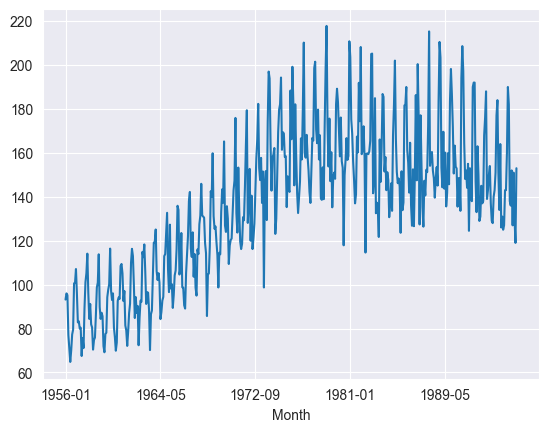

In [8]:
data.set_index('Month')['Monthly beer production'].plot()

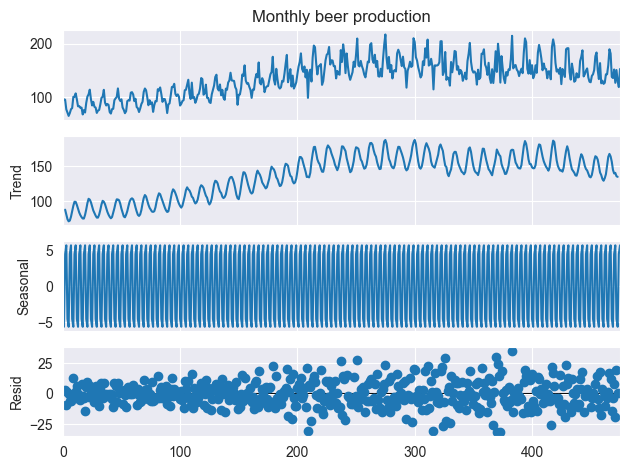

In [13]:
series = data['Monthly beer production']
result = seasonal_decompose(series,model = 'additive',period = 4)
result.plot()
plt.show()

In [16]:
alpha = 0.1
ses = SimpleExpSmoothing(y_train)
def simple_exp():
    fit1 = ses.fit(smoothing_level = alpha)
    fcast1 = fit1.forecast(len(y_test))
    y_test.plot(color = 'pink',label = 'Test')
    fcast1.plot(color = 'purple',label = 'Forecast')
    rmse = root_mean_squared_error(y_test,fcast1)
    plt.title(f"RMSE = {rmse:.2f}, alpha = {alpha:.2f}")
    plt.legend(loc="best")
    plt.show()
widgets.interact(simple_exp,alpha = (0.01,1,0.01))

interactive(children=(Output(),), _dom_classes=('widget-interact',))

<function __main__.simple_exp()>

# AutoCorrelation

In [17]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error
from ipywidgets import interact,widgets
from statsmodels.graphics.tsaplots import plot_acf

In [18]:
df=  pd.read_csv(r"D:\Datasets\FRED-NROUST.csv")

In [26]:
df

,Date,Value
0,01-01-1949,5.255053
1,01-04-1949,5.261516
2,01-07-1949,5.268013
3,01-10-1949,5.274564
4,01-01-1950,5.281182
...,...,...
291,01-10-2021,4.450651
292,01-01-2022,4.445137
293,01-04-2022,4.440214
294,01-07-2022,4.435784


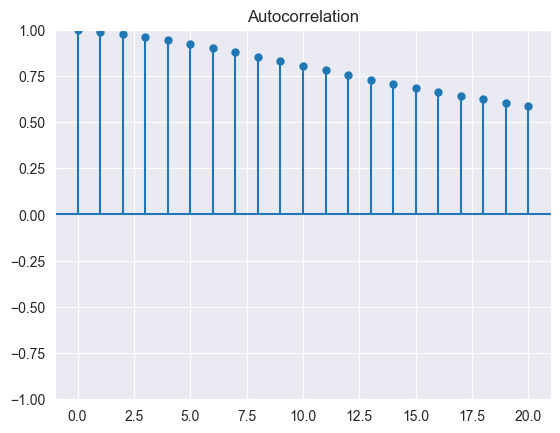

In [29]:
plot_acf(df['Value'],lags = 20,alpha = None)
plt.show()

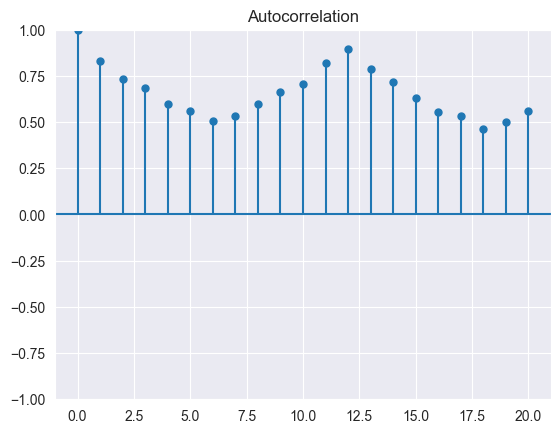

In [25]:
 plot_acf(data['Monthly beer production'],lags = 20, alpha = None)
plt.show()

# ARIMA

In [30]:
df

,Date,Value
0,01-01-1949,5.255053
1,01-04-1949,5.261516
2,01-07-1949,5.268013
3,01-10-1949,5.274564
4,01-01-1950,5.281182
...,...,...
291,01-10-2021,4.450651
292,01-01-2022,4.445137
293,01-04-2022,4.440214
294,01-07-2022,4.435784


In [31]:
y_train = df['Value'][:-8]
y_test = df['Value'][-8:]

In [38]:

model = ARIMA(y_train,order = (1,1,1,))
model_fit = model.fit()
print(model_fit.params)
predictions = model_fit.predict(start = len(y_train),end = len(y_train)+len(y_test)-1,dynamic = False)
predictions

ar.L1     0.934649
ma.L1    -0.152856
sigma2    0.000131
dtype: float64


288    4.471479
289    4.462808
290    4.454704
291    4.447129
292    4.440050
293    4.433433
294    4.427248
295    4.421468
Name: predicted_mean, dtype: float64

# Anomalies Detection

### Isolation Forest

`milk`

In [2]:
milk_data = pd.read_csv(r"D:\Datasets\milk.csv", index_col=0)
cif = IsolationForest(contamination=0.05, random_state=25)
cif.fit(milk_data)
predictions = cif.predict(milk_data)
dict(zip(list(milk_data.index), predictions))
#so,rabbit and seal are outliers

{'HORSE': np.int64(1),
 'ORANGUTAN': np.int64(1),
 'MONKEY': np.int64(1),
 'DONKEY': np.int64(1),
 'HIPPO': np.int64(1),
 'CAMEL': np.int64(1),
 'BISON': np.int64(1),
 'BUFFALO': np.int64(1),
 'GUINEA PIG': np.int64(1),
 'CAT': np.int64(1),
 'FOX': np.int64(1),
 'LLAMA': np.int64(1),
 'MULE': np.int64(1),
 'PIG': np.int64(1),
 'ZEBRA': np.int64(1),
 'SHEEP': np.int64(1),
 'DOG': np.int64(1),
 'ELEPHANT': np.int64(1),
 'RABBIT': np.int64(-1),
 'RAT': np.int64(1),
 'DEER': np.int64(1),
 'REINDEER': np.int64(1),
 'WHALE': np.int64(1),
 'SEAL': np.int64(-1),
 'DOLPHIN': np.int64(1)}

`nutrient`

In [4]:
nut_data = pd.read_csv(r"D:\Datasets\nutrient.csv", index_col=0)
cif = IsolationForest(random_state=25)
cif.fit(nut_data)
predictions = cif.predict(nut_data)
dict(zip(list(nut_data.index), predictions))
#so,rabbit and seal are outliers

{'BEEF BRAISED': np.int64(1),
 'HAMBURGER': np.int64(1),
 'BEEF ROAST': np.int64(-1),
 'BEEF STEAK': np.int64(1),
 'BEEF CANNED': np.int64(1),
 'CHICKEN BROILED': np.int64(1),
 'CHICKEN CANNED': np.int64(1),
 'BEEF HEART': np.int64(-1),
 'LAMB LEG ROAST': np.int64(1),
 'LAMB SHOULDER ROAST': np.int64(1),
 'SMOKED HAM': np.int64(1),
 'PORK ROAST': np.int64(1),
 'PORK SIMMERED': np.int64(1),
 'BEEF TONGUE': np.int64(1),
 'VEAL CUTLET': np.int64(1),
 'BLUEFISH BAKED': np.int64(1),
 'CLAMS RAW': np.int64(-1),
 'CLAMS CANNED': np.int64(-1),
 'CRABMEAT CANNED': np.int64(-1),
 'HADDOCK FRIED': np.int64(1),
 'MACKEREL BROILED': np.int64(1),
 'MACKEREL CANNED': np.int64(1),
 'PERCH FRIED': np.int64(1),
 'SALMON CANNED': np.int64(-1),
 'SARDINES CANNED': np.int64(-1),
 'TUNA CANNED': np.int64(1),
 'SHRIMP CANNED': np.int64(1)}